In [6]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import os
import time
from tqdm import tqdm

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [7]:
file_path = os.listdir('/Users/dongzhang/6980/newMission/wind金融数据/CSRC INDUSTRIES/18FIrst-level')

In [8]:
industry_name = [x[:-4] for x in file_path]

In [10]:
# industry_name

In [11]:
need_ = []
for f in range(len(file_path)):
    tmp = pd.read_csv('18FIrst-level/'+file_path[f],index_col=0)
    need_.append(tmp)
whole = pd.concat(need_)

In [12]:
whole.to_csv('all_first_level.csv')

In [19]:
# whole
df = pd.read_csv('all_first_level.csv',index_col=0)

In [20]:
df.columns

Index(['简称', '日期', '开盘价(元)', '收盘价(元)', '总市值(元)', 'industry', 'month', 'year',
       'first_level'],
      dtype='object')

In [25]:
df.loc[:,'总市值(元)']

代码
300736.SZ    1.500006e+09
300736.SZ    1.649898e+09
300736.SZ    1.814997e+09
300736.SZ    1.996388e+09
300736.SZ    2.196244e+09
                 ...     
300347.SZ    1.390779e+11
300347.SZ    1.452728e+11
300347.SZ    1.448365e+11
300347.SZ    1.422452e+11
300347.SZ    1.425244e+11
Name: 总市值(元), Length: 7779738, dtype: float64

In [26]:
start_time = time.time()
total_dict = {}
# for j in tqdm(range(1)):
for j in tqdm(range(len(industry_name))):
    one_industry_index = {}
    # 选定一个行业
    one_industry = df[df['first_level']==industry_name[j]]
    # 确定了行业之后确定这个行业所能覆盖的交易日
    days = one_industry['日期'].drop_duplicates()
    # print(days)
    for i in range(len(days)):
        # 确定一个行业在一个交易日的信息
        one_industry_one_day = one_industry[one_industry['日期']==days.iloc[i]]
        # 计算每一天的weight
        one_industry_one_day['weight']=one_industry_one_day.loc[:,'总市值(元)']/sum(one_industry_one_day.loc[:,'总市值(元)'])
        # 依据weight和收盘价构造行业指数
        one_industry_one_day_index = sum(one_industry_one_day.loc[:,'收盘价(元)']*one_industry_one_day.loc[:,'weight'])
        one_industry_index[days.iloc[i]]=one_industry_one_day_index
    total_dict[industry_name[j]] = one_industry_index
end_time = time.time()
print('time claupse: ',end_time-start_time)

  0%|          | 0/19 [00:00<?, ?it/s]<ipython-input-26-f1fb149bd96e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_industry_one_day['weight']=one_industry_one_day.loc[:,'总市值(元)']/sum(one_industry_one_day.loc[:,'总市值(元)'])
100%|██████████| 19/19 [17:47<00:00, 56.17s/it]time claupse:  1067.1846058368683



In [27]:
all_index = pd.DataFrame(total_dict)

In [28]:
all_index

,居民服务维修业,交通运输仓储邮政业,建筑业,住宿和餐饮业,科学研究和技术服务业,制造业,采矿业,文体娱乐业,教育业,信息传输、软件和信息技术服务业,金融业,租赁和商务服务业,水利、环境和公共设施管理业,农林牧渔业,电热燃水生产和供应业,批发和零售业,综合业,房地产业,卫生和社会工作业
2018-01-09,11.20,14.200854,9.546660,18.182882,67.260512,47.539242,9.462469,14.727009,20.165122,17.123442,15.894055,15.417796,15.978585,15.347841,8.110944,15.223864,8.298001,14.390166,17.417769
2018-01-10,12.32,14.030459,9.464357,18.713817,63.481249,48.024481,9.541241,14.570331,19.886754,17.122007,15.869787,15.429442,15.800577,15.233441,8.177327,15.114531,8.252489,14.394460,17.172425
2018-01-11,13.56,14.014383,9.445506,19.376374,65.062586,47.194253,9.428567,14.625510,19.646112,17.699372,16.000832,15.427907,15.827951,15.178702,8.218744,15.108044,8.279806,14.357860,17.494348
2018-01-12,14.91,14.006658,9.350560,19.171680,66.565435,48.283528,9.421512,14.606360,19.464470,17.516619,16.333350,15.429210,15.713855,15.307086,8.209229,15.074956,8.292632,14.434442,17.354488
2018-01-15,16.40,13.863628,9.147573,20.407951,63.614958,48.376822,9.291321,14.267555,19.042128,17.004472,16.930040,15.837777,15.201777,14.803986,8.274035,14.902885,8.102730,14.831554,17.003136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-03,NaN,14.050593,9.486052,18.632787,70.041712,42.858223,9.024046,15.031434,20.060978,17.358310,15.873363,15.295334,16.547843,14.208308,8.057989,15.129822,8.245107,13.093297,16.589704
2018-01-04,NaN,14.379776,9.458115,18.964962,68.752016,44.351907,9.137926,14.950587,20.009918,17.495399,15.817353,15.250433,16.313002,14.285079,8.012767,15.124239,8.272361,13.355080,16.499389
2018-01-05,NaN,14.226740,9.548504,19.060020,69.578600,44.425815,9.244107,14.952164,20.059579,17.273552,15.748552,15.190009,16.183052,14.593461,8.045261,15.118225,8.349118,13.883579,16.976519
2018-01-08,NaN,14.095652,9.584860,18.578024,66.917876,45.329081,9.529157,14.717508,20.106856,17.242491,15.565610,15.400840,16.097558,15.428982,8.064104,15.204235,8.323524,14.384501,17.050635


In [29]:
all_index.sort_index(inplace=True)

In [30]:
all_index['日期']=all_index.index
all_index['year'] = all_index.apply(lambda x:x['日期'][:-6],axis=1)
years = all_index.year.drop_duplicates()
for i in range(len(years)):
    year1 = all_index[all_index.year==years[i]][:-1]
    year1.set_index(year1['year'])
    year1 = year1.drop(['日期','year'],axis=1)
    dyear = year1.diff()/year1
    dyear = (dyear-dyear.mean())/dyear.std()
    corr = dyear.corr()
    corr.to_csv(years[i]+' first-level corr.csv')

In [31]:
all_index.to_csv('all_first_level_10_20.csv')

In [32]:
all_index = pd.read_csv('all_first_level_10_20.csv',index_col=0)

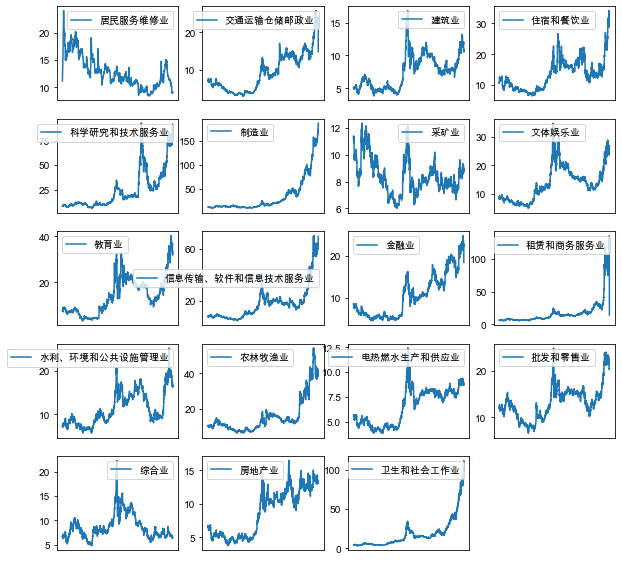

In [34]:
plt.figure(figsize=(10,10))
# for i in range
# ind = [all_index.iloc[:,1].index[i][:-3] if i%360==0 else ' ' for i in range(0, 2674)]
for i in range(19):
    plt.subplot(5,4,i+1)
    plt.plot(all_index.iloc[:,i].index,all_index.iloc[:,i].values,label=f'{industry_name[i]}')
    plt.xticks([])
    plt.legend()
plt.show()